#Libraries and drive mount

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#loading data

In [31]:
dataset = pd.read_csv('/content/drive/MyDrive/data_for_ex4/EURUSD_Daily_20140101_20211001.csv', usecols=[0,1,2,3,4])

cols = list(['OPEN','HIGH','LOW','CLOSE'])

dataset = pd.DataFrame(dataset, columns=cols)

dataset

,OPEN,HIGH,LOW,CLOSE
0,1.37550,1.37648,1.37372,1.37580
1,1.37581,1.37749,1.36294,1.36643
2,1.36643,1.36716,1.35821,1.35874
3,1.35955,1.36528,1.35712,1.36334
4,1.36334,1.36562,1.35966,1.36138
...,...,...,...,...
2006,1.17255,1.17255,1.16848,1.16952
2007,1.16940,1.17032,1.16682,1.16826
2008,1.16825,1.16901,1.15894,1.15969
2009,1.15963,1.16097,1.15626,1.15769


#Split into train and test

In [32]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(dataset, test_size=0.2 , shuffle=False)

Text(0.5, 1.0, 'CLOSE of EURUSD TRAIN')

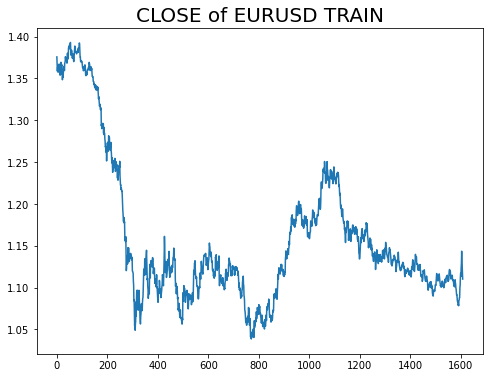

In [51]:
train.CLOSE.plot(figsize=(8, 6),)
plt.title("CLOSE of EURUSD TRAIN", fontsize=20)

Text(0.5, 1.0, 'CLOSE of EURUSD TEST')

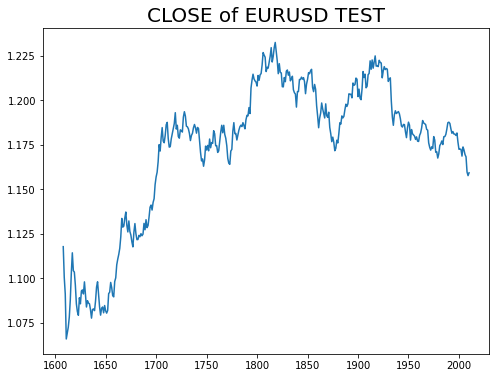

In [52]:
test.CLOSE.plot(figsize=(8, 6),)
plt.title("CLOSE of EURUSD TEST", fontsize=20)

#Nomalization

Text(0.5, 1.0, 'CLOSE of EURUSD TRAIN_NORM')

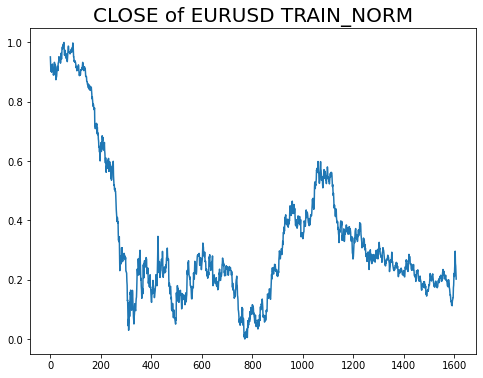

In [53]:
#normalized_train=(train-train.mean())/train.std()
normalized_train=(train-train.min())/(train.max()-train.min())
normalized_train.CLOSE.plot(figsize=(8, 6),)
plt.title("CLOSE of EURUSD TRAIN_NORM", fontsize=20)

Text(0.5, 1.0, 'CLOSE of EURUSD TEST_NORM')

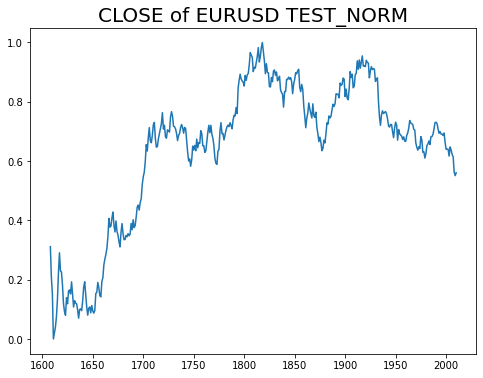

In [36]:
#normalized_test=(test-test.mean())/test.std()
normalized_test=(test-test.min())/(test.max()-test.min())
normalized_test.CLOSE.plot(figsize=(8, 6),)
plt.title("CLOSE of EURUSD TEST_NORM", fontsize=20)

#Convert to flatten list

In [37]:
temp = normalized_train.values.tolist()
train_ = [x for l in temp for x in l]

temp = normalized_test.values.tolist()
test_ = [x for l in temp for x in l]

In [38]:
train_[0]

0.9505330249873086

#answering to questions

In [125]:
days=10
x_train=[]
y_train=[]

for i in range (0,int(len(train_)/4)-days+1):
    x_train.append(train_[i*4:(i*4)+4*days-1])
    y_train.append(train_[(i*4)+4*days-1])



In [126]:
print(train_[0:days*4])
print()
print(x_train[0])
print()
print(y_train[0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


[0.9505330249873086, 0.9361243952233124, 0.9518801606784201, 0.9513502836018847, 0.9514072987760165, 0.9389490169756964, 0.9218087480473109, 0.9249089934249513, 0.9249534660725365, 0.9100595687557677, 0.9086141486275388, 0.9032085108784604, 0.9055502284392802, 0.9048018569790522, 0.9055735326935954, 0.9161892936761011, 0.9162389305657396, 0.9057527197471822, 0.9126590046864541, 0.9106583514405847, 0.9108240735518078, 0.8997958441703716, 0.9005802276277614, 0.8996811242486661, 0.8996559309605733, 0.8992085465782916, 0.8992133452354386, 0.9072438411829445, 0.9072705736364148, 0.9143943843163576, 0.9058245927248382, 0.9255298134717946, 0.9254893112978739, 0.9136952205162623, 0.9240124972104437, 0.9259530998673702, 0.9259969541429296, 0.9177783371088176, 0.9272762776166034, 0.9271383017749811]

[0.9505330249873086, 0.9361243952233124, 0.9518801606784201, 0.9513502836018847, 0.9514072987760165, 0.9389490169756964, 0.9218087480473109, 0.9249089934249513, 0.9249534660725365, 0.910059568755767

In [127]:
x_test=[]
y_test=[]

for i in range (0,int(len(test_)/4)-days+1):
    x_test.append(test_[i*4:(i*4)+4*days-1])
    y_test.append(test_[(i*4)+4*days-1])



In [128]:
print(test_[0:days*4])
print()
print(x_test[0])
print()
print(y_test[0])

x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

[0.3167888474942917, 0.27045097011012104, 0.2754876702245121, 0.311348496669268, 0.31023915394784407, 0.23938122705820727, 0.1959882223040111, 0.2078257216587658, 0.20712654728999022, 0.14499213424226623, 0.10188933873144397, 0.1516533637400235, 0.15040259584184637, 0.10350026219192573, 0.011409642988590178, 0.0, 0.0, 0.004653906659674805, 0.0012268433321063537, 0.020764568205005204, 0.019408724912872755, 0.0023597273203994355, 0.0, 0.04008881954029897, 0.03677442615070374, 0.04208180388044108, 0.053429027113237555, 0.07417631879013337, 0.07264751832712497, 0.04594913476664892, 0.0764323395902351, 0.1324491388105385, 0.13117413772383252, 0.1539066596748831, 0.14384738068948563, 0.2221688771529739, 0.22088691263069388, 0.21185107498689118, 0.19494540547172057, 0.29058392846426284]

[0.3167888474942917, 0.27045097011012104, 0.2754876702245121, 0.311348496669268, 0.31023915394784407, 0.23938122705820727, 0.1959882223040111, 0.2078257216587658, 0.20712654728999022, 0.14499213424226623, 0.1

In [129]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=2)

Epoch 1/2
1599/1599 [==============================] - 129s 79ms/step - loss: 0.0276
Epoch 2/2
1599/1599 [==============================] - 133s 83ms/step - loss: 0.0195


In [130]:
# Get the models predicted price values 
predictions = model.predict(x_test)
# Get the root mean squared error (RMSE)
mae = np.mean((abs(predictions - y_test)))
mae

0.26874636164071325

##پاسخ به سوال 5


mae on test  for days=10 epochs=1 =>train error   0.03
mae on test  for days=10 epochs=2 =>train error   0.02

mae on test  for days=10 epochs=1 =>test error   0.34
mae on test  for days=10 epochs=2 =>test error   0.25
با افزایش تعداد ایپاک ها در اندازه پنجره ی برابر میزان خطا بر روی داده های تست و ترین کمتر شده است.


mae on test  for days=3 epochs=1 =>train error   0.031
mae on test  for days=3 epochs=2 =>train error   0.02

mae on test  for days=10 epochs=1 =>test error   0.37
mae on test  for days=10 epochs=2 =>test error   0.26

باکاهش سایز پنجره خطا افزایش داشته است.

با افزایش سایز پنجره از 10 به 15 و بیشتر هیچ تغییری در نتایج مشاهده نشد از این رو میزان سایز پنجره 10 روز در نظر گرفته شد. که معادل با 39 داده قبل از داده ای است که قصد حدس زدن آن را داریم.

In [131]:
predictions_new=np.append(predictions,a)
predictions_new=np.resize(predictions_new,[predictions.shape[0]+days-1,1])

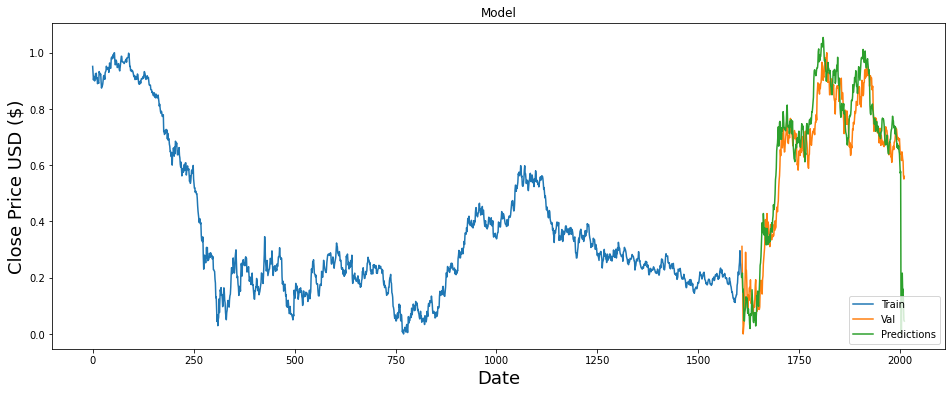

In [132]:
normalized_test['Predictions'] = predictions_new
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(normalized_train['CLOSE'])
plt.plot(normalized_test[['CLOSE', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [133]:
a=np.zeros(days-1)
a=np.resize(a,[days-1,1])

In [134]:
predictions.shape[0]

394